# Ten minutes to Pandas

Pandas is a Python Data Analysis Library.  

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Generate Pandas Object  
`pandas` has 3 basic structure:
- `Series`
    - 1D lableled homogeneously-style array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, also size-mutable array

### Series 
1D `Series` can be initialized by 1D list

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


### DataFrame

In [5]:
# 1. Generate 6 dates as the index of dataframe.
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.250639,-1.262108,0.105726,0.603080
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510
2013-01-03,0.060557,-0.162369,0.731786,-0.766186
2013-01-04,0.762603,0.310699,-0.925853,1.371074
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710
2013-01-06,0.209076,1.405699,-0.218958,0.177088


In [7]:
# If index ans columns params are not specified, they will start with 0.
pd.DataFrame(np.random.randn(6, 4))

,0,1,2,3
0,0.895642,0.167651,-1.731336,-0.569874
1,-0.117194,0.586384,-0.021153,-1.056581
2,-0.051981,0.807216,1.726981,-1.368907
3,1.768439,0.726143,1.191752,0.009374
4,0.575415,0.320573,0.191553,0.499600
5,0.636744,-0.122908,0.008939,0.599181


In [9]:
# input: dictionary
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
    'D' : np.array([3] * 4, dtype='int32'),
    'E' : pd.Categorical(["test", "train", "test", "trian"]),
    'F' : 'foo',
})
df2
# each key represents one column, value can be any objects which can be converted to `Series` Object.

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,trian,foo


In [10]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

## Check data

### the head and tail of the data 

In [11]:
df.head()

,A,B,C,D
2013-01-01,1.250639,-1.262108,0.105726,0.603080
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510
2013-01-03,0.060557,-0.162369,0.731786,-0.766186
2013-01-04,0.762603,0.310699,-0.925853,1.371074
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,0.762603,0.310699,-0.925853,1.371074
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710
2013-01-06,0.209076,1.405699,-0.218958,0.177088


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[ 1.25063944, -1.26210773,  0.10572627,  0.6030795 ],
       [-0.01381712,  0.56718908, -0.06364806, -1.90550963],
       [ 0.06055748, -0.16236867,  0.73178608, -0.76618614],
       [ 0.76260286,  0.31069946, -0.92585309,  1.37107424],
       [ 0.62917201, -0.30323621, -0.86598485, -0.47570967],
       [ 0.20907566,  1.40569934, -0.21895769,  0.17708812]])

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.483038,0.092646,-0.206155,-0.166027
std,0.487675,0.900440,0.624631,1.144887
min,-0.013817,-1.262108,-0.925853,-1.905510
25%,0.097687,-0.268019,-0.704228,-0.693567
50%,0.419124,0.074165,-0.141303,-0.149311
75%,0.729245,0.503067,0.063383,0.496582
max,1.250639,1.405699,0.731786,1.371074


In [17]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.250639,-0.013817,0.060557,0.762603,0.629172,0.209076
B,-1.262108,0.567189,-0.162369,0.310699,-0.303236,1.405699
C,0.105726,-0.063648,0.731786,-0.925853,-0.865985,-0.218958
D,0.603080,-1.905510,-0.766186,1.371074,-0.475710,0.177088


In [18]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,0.209076,1.405699,-0.218958,0.177088
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710
2013-01-04,0.762603,0.310699,-0.925853,1.371074
2013-01-03,0.060557,-0.162369,0.731786,-0.766186
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510
2013-01-01,1.250639,-1.262108,0.105726,0.603080


In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.603080,0.105726,-1.262108,1.250639
2013-01-02,-1.905510,-0.063648,0.567189,-0.013817
2013-01-03,-0.766186,0.731786,-0.162369,0.060557
2013-01-04,1.371074,-0.925853,0.310699,0.762603
2013-01-05,-0.475710,-0.865985,-0.303236,0.629172
2013-01-06,0.177088,-0.218958,1.405699,0.209076


In [22]:
df.sort_values(by="B")

,A,B,C,D
2013-01-01,1.250639,-1.262108,0.105726,0.603080
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710
2013-01-03,0.060557,-0.162369,0.731786,-0.766186
2013-01-04,0.762603,0.310699,-0.925853,1.371074
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510
2013-01-06,0.209076,1.405699,-0.218958,0.177088


## Index

In [23]:
df['A']

2013-01-01    1.250639
2013-01-02   -0.013817
2013-01-03    0.060557
2013-01-04    0.762603
2013-01-05    0.629172
2013-01-06    0.209076
Freq: D, Name: A, dtype: float64

In [24]:
df.A

2013-01-01    1.250639
2013-01-02   -0.013817
2013-01-03    0.060557
2013-01-04    0.762603
2013-01-05    0.629172
2013-01-06    0.209076
Freq: D, Name: A, dtype: float64

In [25]:
df[0:3]

,A,B,C,D
2013-01-01,1.250639,-1.262108,0.105726,0.603080
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510
2013-01-03,0.060557,-0.162369,0.731786,-0.766186


In [26]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,1.250639,-1.262108,0.105726,0.603080
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510
2013-01-03,0.060557,-0.162369,0.731786,-0.766186


In [27]:
df.loc[dates[0]]

A    1.250639
B   -1.262108
C    0.105726
D    0.603080
Name: 2013-01-01 00:00:00, dtype: float64

In [28]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.250639,-1.262108
2013-01-02,-0.013817,0.567189
2013-01-03,0.060557,-0.162369
2013-01-04,0.762603,0.310699
2013-01-05,0.629172,-0.303236
2013-01-06,0.209076,1.405699


In [29]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.013817,0.567189
2013-01-03,0.060557,-0.162369
2013-01-04,0.762603,0.310699


In [30]:
df.loc['20130102', ['A', 'B']]

A   -0.013817
B    0.567189
Name: 2013-01-02 00:00:00, dtype: float64

In [31]:
df.loc[dates[0], 'B']

-1.262107733885453

In [32]:
df.at[dates[0], 'B']

-1.262107733885453

In [33]:
# use at quicker
%timeit -n100 df.loc[dates[0], 'B']
%timeit -n100 df.at[dates[0], 'B']

30.5 µs ± 9.43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.4 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
df.iloc[3]

A    0.762603
B    0.310699
C   -0.925853
D    1.371074
Name: 2013-01-04 00:00:00, dtype: float64

In [35]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.762603,0.310699
2013-01-05,0.629172,-0.303236


In [36]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,-0.013817,-0.063648
2013-01-03,0.060557,0.731786
2013-01-05,0.629172,-0.865985


In [37]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510
2013-01-03,0.060557,-0.162369,0.731786,-0.766186


In [38]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.262108,0.105726
2013-01-02,0.567189,-0.063648
2013-01-03,-0.162369,0.731786
2013-01-04,0.310699,-0.925853
2013-01-05,-0.303236,-0.865985
2013-01-06,1.405699,-0.218958


In [39]:
df.iloc[1, 1]

0.5671890765175291

In [40]:
df.iat[1, 1]

0.5671890765175291

In [41]:
%timeit -n100 df.iloc[1, 1]
%timeit -n100 df.iat[1, 2]

25.4 µs ± 3.36 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.250639,-1.262108,0.105726,0.603080
2013-01-03,0.060557,-0.162369,0.731786,-0.766186
2013-01-04,0.762603,0.310699,-0.925853,1.371074
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710
2013-01-06,0.209076,1.405699,-0.218958,0.177088


In [43]:
df[df > 0]

,A,B,C,D
2013-01-01,1.250639,NaN,0.105726,0.603080
2013-01-02,NaN,0.567189,NaN,NaN
2013-01-03,0.060557,NaN,0.731786,NaN
2013-01-04,0.762603,0.310699,NaN,1.371074
2013-01-05,0.629172,NaN,NaN,NaN
2013-01-06,0.209076,1.405699,NaN,0.177088


In [44]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,1.250639,-1.262108,0.105726,0.603080,one
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510,one
2013-01-03,0.060557,-0.162369,0.731786,-0.766186,two
2013-01-04,0.762603,0.310699,-0.925853,1.371074,three
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710,four
2013-01-06,0.209076,1.405699,-0.218958,0.177088,three


In [45]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.060557,-0.162369,0.731786,-0.766186,two
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710,four


In [47]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [49]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,1.250639,-1.262108,0.105726,0.603080,NaN
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510,1.0
2013-01-03,0.060557,-0.162369,0.731786,-0.766186,2.0
2013-01-04,0.762603,0.310699,-0.925853,1.371074,3.0
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710,4.0
2013-01-06,0.209076,1.405699,-0.218958,0.177088,5.0


In [50]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-1.262108,0.105726,0.603080,NaN
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510,1.0
2013-01-03,0.060557,-0.162369,0.731786,-0.766186,2.0
2013-01-04,0.762603,0.310699,-0.925853,1.371074,3.0
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710,4.0
2013-01-06,0.209076,1.405699,-0.218958,0.177088,5.0


In [51]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.105726,0.603080,NaN
2013-01-02,-0.013817,0.567189,-0.063648,-1.905510,1.0
2013-01-03,0.060557,-0.162369,0.731786,-0.766186,2.0
2013-01-04,0.762603,0.310699,-0.925853,1.371074,3.0
2013-01-05,0.629172,-0.303236,-0.865985,-0.475710,4.0
2013-01-06,0.209076,1.405699,-0.218958,0.177088,5.0


In [52]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.105726,5.0,NaN
2013-01-02,-0.013817,0.567189,-0.063648,5.0,1.0
2013-01-03,0.060557,-0.162369,0.731786,5.0,2.0
2013-01-04,0.762603,0.310699,-0.925853,5.0,3.0
2013-01-05,0.629172,-0.303236,-0.865985,5.0,4.0
2013-01-06,0.209076,1.405699,-0.218958,5.0,5.0


In [53]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.105726,-5.0,NaN
2013-01-02,-0.013817,-0.567189,-0.063648,-5.0,-1.0
2013-01-03,-0.060557,-0.162369,-0.731786,-5.0,-2.0
2013-01-04,-0.762603,-0.310699,-0.925853,-5.0,-3.0
2013-01-05,-0.629172,-0.303236,-0.865985,-5.0,-4.0
2013-01-06,-0.209076,-1.405699,-0.218958,-5.0,-5.0


### Missing values

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.105726,5.0,NaN,1.0
2013-01-02,-0.013817,0.567189,-0.063648,5.0,1.0,1.0
2013-01-03,0.060557,-0.162369,0.731786,5.0,2.0,NaN
2013-01-04,0.762603,0.310699,-0.925853,5.0,3.0,NaN


In [55]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.013817,0.567189,-0.063648,5.0,1.0,1.0


In [56]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.105726,5.0,5.0,1.0
2013-01-02,-0.013817,0.567189,-0.063648,5.0,1.0,1.0
2013-01-03,0.060557,-0.162369,0.731786,5.0,2.0,5.0
2013-01-04,0.762603,0.310699,-0.925853,5.0,3.0,5.0


In [57]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Computational Operation

In [58]:
df.mean()

A    0.274598
B    0.302997
C   -0.206155
D    5.000000
F    3.000000
dtype: float64

In [60]:
df.mean(1)

2013-01-01    1.276432
2013-01-02    1.297945
2013-01-03    1.525995
2013-01-04    1.629490
2013-01-05    1.691990
2013-01-06    2.279163
Freq: D, dtype: float64

In [62]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(1)
s

2013-01-01    NaN
2013-01-02    1.0
2013-01-03    3.0
2013-01-04    5.0
2013-01-05    NaN
2013-01-06    6.0
Freq: D, dtype: float64

In [64]:
# df - s
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,-1.013817,-0.432811,-1.063648,4.0,0.0
2013-01-03,-2.939443,-3.162369,-2.268214,2.0,-1.0
2013-01-04,-4.237397,-4.689301,-5.925853,0.0,-2.0
2013-01-05,NaN,NaN,NaN,NaN,NaN
2013-01-06,-5.790924,-4.594301,-6.218958,-1.0,-1.0


### Apply Operation

In [66]:
# Similar to the apply operation in R, it takes a function as an argument,
# by default applying the function to each column.
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.105726,5.0,NaN
2013-01-02,-0.013817,0.567189,0.042078,10.0,1.0
2013-01-03,0.046740,0.404820,0.773864,15.0,3.0
2013-01-04,0.809343,0.715520,-0.151989,20.0,6.0
2013-01-05,1.438515,0.412284,-1.017974,25.0,10.0
2013-01-06,1.647591,1.817983,-1.236931,30.0,15.0


In [67]:
# Calculate the difference between the maximum and minimum values for each column.
df.apply(lambda x: x.max() - x.min())

A    0.776420
B    1.708936
C    1.657639
D    0.000000
F    4.000000
dtype: float64

In [69]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    0
2    0
3    6
4    4
5    6
6    4
7    4
8    0
9    2
dtype: int64

In [70]:
s.value_counts()

4    4
0    3
6    2
2    1
Name: count, dtype: int64

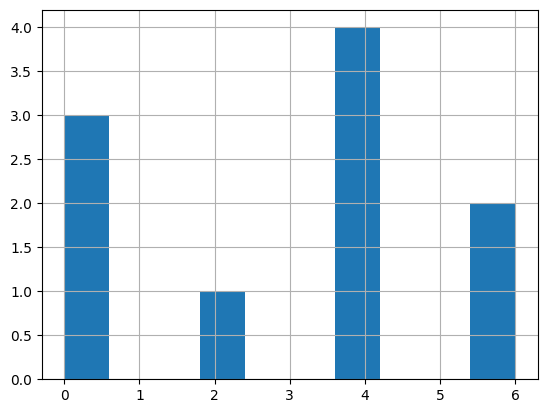

In [71]:
h = s.hist()

### String Methods

In [73]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [74]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.945840,-1.800220,-0.209912,-1.540807
1,-0.410048,-0.806016,-1.010534,-0.132666
2,1.470920,-1.175669,-0.851360,-0.753030
3,0.409354,-0.391641,-0.570417,0.097758
4,0.674313,-0.018856,0.698285,-2.201401
5,-1.122959,1.161784,0.067594,-0.771718
6,0.287516,-2.158142,0.319755,0.589938
7,0.436428,-0.323260,0.536309,-0.872582
8,0.841464,-0.625405,-0.839319,-0.771754
9,-0.437728,1.135849,-0.719162,0.999031


In [75]:
pieces = [df[:2], df[4:5], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,0.945840,-1.800220,-0.209912,-1.540807
1,-0.410048,-0.806016,-1.010534,-0.132666
4,0.674313,-0.018856,0.698285,-2.201401
7,0.436428,-0.323260,0.536309,-0.872582
8,0.841464,-0.625405,-0.839319,-0.771754
9,-0.437728,1.135849,-0.719162,0.999031


### Join

In [76]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
right = pd.DataFrame({'key':['foo', 'foo'], 'rval':[4,5]})

print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [77]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [78]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.493603,0.029026,0.835711,0.126056
1,-1.962608,1.449429,1.769699,-0.963499
2,1.753268,-0.236574,-1.786951,-0.448090
3,0.104580,1.483321,-0.374052,-0.376433
4,0.657137,0.032797,0.547666,-0.511270
5,-1.291583,-0.116233,1.527843,1.454833
6,1.566068,-1.569635,0.439416,1.326915
7,0.448152,-0.278793,-3.055268,-0.003326


In [79]:
# This method is removed after pandas 2.0.
s = df.iloc[3]
df.append(s, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [80]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-2.678684,-0.408497
1,bar,one,0.436237,-0.937523
2,foo,two,1.646571,-0.915124
3,bar,three,-0.636952,-1.655041
4,foo,two,-0.307974,0.385542
5,bar,two,0.039234,-0.453574
6,foo,one,0.579391,-0.726309
7,foo,three,0.314351,0.198398


In [81]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-0.161481,-3.046138
foo,onetwotwoonethree,-0.446346,-1.465991


In [82]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.436237 -0.937523
    three -0.636952 -1.655041
    two    0.039234 -0.453574
foo one   -2.099294 -1.134807
    three  0.314351  0.198398
    two    1.338597 -0.529582

In [83]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one    -1.207147  1.286440
      two    -1.745564 -1.683926
baz   one     0.527789  0.140316
      two     0.147383  0.699057
foo   one     0.834401 -1.275995
      two    -0.371829  1.301346
qux   one    -1.631834  1.476427
      two    -1.812828 -0.073973

In [84]:
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.207147
               B    1.286440
       two     A   -1.745564
               B   -1.683926
baz    one     A    0.527789
               B    0.140316
       two     A    0.147383
               B    0.699057
dtype: float64

In [85]:
stacked.unstack()

A         B
first second                    
bar   one    -1.207147  1.286440
      two    -1.745564 -1.683926
baz   one     0.527789  0.140316
      two     0.147383  0.699057

In [86]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.207147 -1.745564
      B  1.286440 -1.683926
baz   A  0.527789  0.147383
      B  0.140316  0.699057

### Time Series

Time series data commonly used in financial analysis.

In [2]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.669233
2012-03-07    0.474967
2012-03-08    0.072310
2012-03-09    0.648332
2012-03-10   -1.321645
Freq: D, dtype: float64

Standard time representation

In [3]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00    0.669233
2012-03-07 00:00:00+00:00    0.474967
2012-03-08 00:00:00+00:00    0.072310
2012-03-09 00:00:00+00:00    0.648332
2012-03-10 00:00:00+00:00   -1.321645
Freq: D, dtype: float64

Change time zone representation

In [4]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.669233
2012-03-06 19:00:00-05:00    0.474967
2012-03-07 19:00:00-05:00    0.072310
2012-03-08 19:00:00-05:00    0.648332
2012-03-09 19:00:00-05:00   -1.321645
Freq: D, dtype: float64

### Categoricals

In [5]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


can change grade to categories.

In [6]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [7]:
# Convert the representation of the category to meaningful characters.
df["grade"] = df["grade"].cat.rename_categories({"a":"very good", "b": "good", "e":"very bad"})

df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [8]:
# Add missing categories
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [9]:
# Grouping by `grade`
df.groupby("grade").size()

/var/folders/mj/lskkwkw96l322ms2w17k55wm0000gn/T/ipykernel_73590/1188239056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

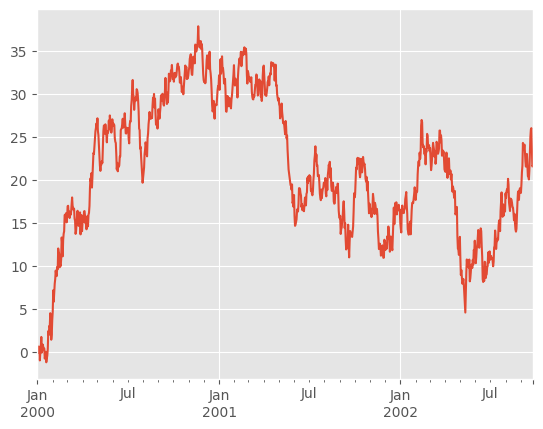

In [10]:
# ggplot
plt.style.use('ggplot')
# plotting series
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
p = ts.cumsum().plot()

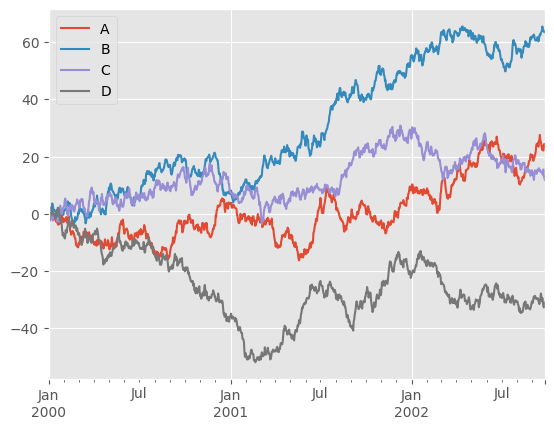

In [11]:
# Plot the DataFrame by columns
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df.cumsum().plot()
p = plt.legend(loc="best")

## File I/O

CSV

In [12]:
df.to_csv('foo.csv')

In [13]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.375625,-0.403188,0.521898,-0.590033
1,2000-01-02,0.183221,-1.124848,-0.294154,-0.551404
2,2000-01-03,-1.445203,-0.286443,-0.562452,-0.288537
3,2000-01-04,1.132400,0.659482,-1.700384,0.382893
4,2000-01-05,1.346817,-2.066896,0.005788,1.326362


excel

In [12]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [13]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.541443,1.203591,0.573325,-1.634354
1,2000-01-02,0.207781,-0.436946,0.939278,-0.566718
2,2000-01-03,1.292029,-1.334464,-0.921115,-0.340138
3,2000-01-04,-0.063764,0.002581,-0.493000,2.562063
4,2000-01-05,-0.512814,0.772247,-0.016097,-0.169956


Stata

In [14]:
df = pd.DataFrame(np.random.randn(10, 2), columns=list("AB"))
df.to_stata("stata.dta")

In [15]:
pd.read_stata("stata.dta").head()

,index,A,B
0,0,1.553529,-1.111807
1,1,1.710499,0.752472
2,2,-0.861150,1.400625
3,3,-1.953266,-0.733935
4,4,-0.270928,0.533525


Cleaning up temporary generated files.

In [16]:
import glob
import os
for f in glob.glob('foo*'):
    os.remove(f)
for f in glob.glob('stata*'):
    os.remove(f)